<a href="https://colab.research.google.com/github/Yagoly/Brecha_de_energia/blob/main/Brecha_de_energ%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cargamos los módulos que vamos a usar 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import drive #importamos drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargamos los datos del data set 
d1_21 = pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/d1_21.csv")
d1t = pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/d1t.csv")
d2_97 = pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/d2_97.csv")
d2t = pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/d2t.csv")
df1v =pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/df1v.csv")
df1t =pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/df1v.csv")
df1v =pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/df2v.csv")
df2t =pd.read_csv("/content/drive/MyDrive/FISICA/SEMESTRE 2023-1/LABO CONTEMPO II/EXPERIMENTO 3. BRECHA DE ENERGÍA/df2t.csv")

In [5]:
df1v_1=df1v.rename({"V":"V[v]", "Delta V 1.5%": "\u0394V (+/-1.5%)", "I": "I[mA]", "delta I 2%": "\u0394I (+/- 2%)", "Delta Ln 2%": "\u0394VLn(I)(+/-2%)"}, axis=1)
df1v_1

,V[v],ΔV (+/-1.5%),I[mA],ΔI (+/- 2%),Ln(I),ΔVLn(I)(+/-2%)
0,0.09,0.00135,0.42,0.0084,-0.867501,-0.017350
1,0.14,0.00210,0.61,0.0122,-0.494296,-0.009886
2,0.23,0.00345,1.00,0.0200,0.000000,0.000000
3,0.35,0.00525,1.56,0.0312,0.444686,0.008894
4,0.40,0.00600,1.79,0.0358,0.582216,0.011644
5,0.51,0.00765,2.26,0.0452,0.815365,0.016307
6,0.60,0.00900,2.63,0.0526,0.966984,0.019340
7,0.81,0.01215,4.26,0.0852,1.449269,0.028985
8,0.99,0.01485,4.35,0.0870,1.470176,0.029404
9,1.04,0.01560,4.56,0.0912,1.517323,0.030346


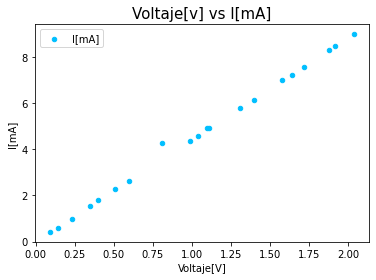

In [6]:
df1v_1.plot.scatter(x="V[v]", y="I[mA]", color="deepskyblue")
plt.title("Voltaje[v] vs I[mA]", size=15)
plt.xlabel("Voltaje[V]")
plt.ylabel("I[mA]")
plt.legend(["I[mA]"])


Parámetros del modelo de regresión lineal
b (Pendiente) =[1.53936784], a (Punto de corte) = -0.2966088072365405

Evaluación de calidad de la regresión
Error Cuadrático Medio (MSE) = 0.11587872923014432
Raíz del error Cuadrático Medio (RMSE) = 0.34040964914371086
Coeficiente de Determinación R2 =0.8640788586893449


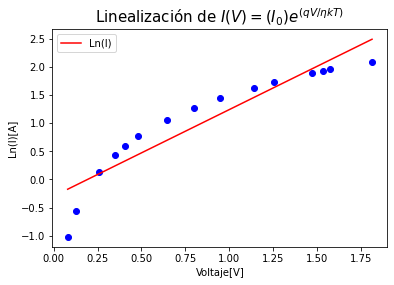

In [7]:
# definimos las variables
x=d1_21.iloc[:,:-1].values
y=d1_21.iloc[:,1].values

#graficamos los datos de entrada
plt.scatter(x, y, label="data", color="blue")


#entrenamos el modelo de regresión lineal
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x.reshape(-1,1),y)

#imprimimos los parámetros que ha estimado la regresión lineal
print("\nParámetros del modelo de regresión lineal")
print("b (Pendiente) =" + str(regresion_lineal.coef_) + ", a (Punto de corte) = " + str(regresion_lineal.intercept_))

pronostico_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
mse= mean_squared_error(y_true = y, y_pred = pronostico_entrenamiento)
rmse = np.sqrt(mse)

#Evaluando la calidad de la regesión
print("\nEvaluación de calidad de la regresión")
print("Error Cuadrático Medio (MSE) = "+ str(mse))
print("Raíz del error Cuadrático Medio (RMSE) = " + str(rmse))
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print("Coeficiente de Determinación R2 =" + str(r2))

#graficamos los datos de entrada
plt.plot(x, pronostico_entrenamiento, label="data", color="red")
plt.title("Linealización de $I(V)=(I_0)e^{(qV/\u03B7kT)}$", size=15)
plt.xlabel("Voltaje[V]")
plt.ylabel("Ln(I)[A]")
plt.legend(["Ln(I)"])

In [8]:
df1t_1=df1t.rename({"V":"V[v]", "Delta V 1.5%": "\u0394V (+/-1.5%)", "I": "I[mA]", "delta I 2%": "\u0394I (+/- 2%)", "T":"Temperatura[°C]","K":"Temperatura[°K]","Delta T": "\u0394VT(+/1 K)"}, axis=1)
df1t_1

,Voltaje,Delta V 1.55,I[mA],Delta I 2%,Ln(I),Delta Ln 2%
0,0.080,0.001200,0.36,0.0072,-1.021651,-0.020433
1,0.128,0.001920,0.57,0.0114,-0.562119,-0.011242
2,0.257,0.003855,1.14,0.0228,0.131028,0.002621
3,0.347,0.005205,1.55,0.0310,0.438255,0.008765
4,0.405,0.006075,1.82,0.0364,0.598837,0.011977
5,0.481,0.007215,2.16,0.0432,0.770108,0.015402
6,0.643,0.009645,2.89,0.0578,1.061257,0.021225
7,0.797,0.011955,3.57,0.0714,1.272566,0.025451
8,0.948,0.014220,4.25,0.0850,1.446919,0.028938
9,1.139,0.017085,5.11,0.1022,1.631199,0.032624



Parámetros del modelo de regresión lineal
b (Pendiente) =[[-0.03820492]], a (Punto de corte) = [13.92031521]

Evaluación de calidad de la regresión
Error Cuadrático Medio (MSE) = 0.026877472009276336
Raíz del error Cuadrático Medio (RMSE) = 0.16394350249179238
Coeficiente de Determinación R2 =0.9243273822665653


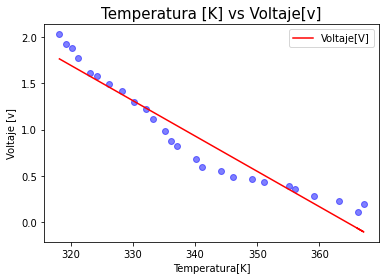

In [9]:
# definimos las variables
y=d1t.iloc[:,:-2].values
x=d1t.iloc[:,1].values

#graficamos los datos de entrada
plt.scatter(x, y, label="data", color="blue", alpha=0.5)


#entrenamos el modelo de regresión lineal
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x.reshape(-1,1),y)

#imprimimos los parámetros que ha estimado la regresión lineal
print("\nParámetros del modelo de regresión lineal")
print("b (Pendiente) =" + str(regresion_lineal.coef_) + ", a (Punto de corte) = " + str(regresion_lineal.intercept_))

pronostico_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
mse= mean_squared_error(y_true = y, y_pred = pronostico_entrenamiento)
rmse = np.sqrt(mse)

#Evaluando la calidad de la regesión
print("\nEvaluación de calidad de la regresión")
print("Error Cuadrático Medio (MSE) = "+ str(mse))
print("Raíz del error Cuadrático Medio (RMSE) = " + str(rmse))
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print("Coeficiente de Determinación R2 =" + str(r2))

#graficamos los datos de entrada
plt.plot(x, pronostico_entrenamiento, label="data", color="red")
plt.title("Temperatura [K] vs Voltaje[v]", size=15)
plt.xlabel("Temperatura[K]")
plt.ylabel("Voltaje [v]")
plt.legend(["Voltaje[V]"])

In [10]:
df2v_2=df1v.rename({"V":"V[v]", "Delta V 1.5%": "\u0394V (+/-1.5%)", "I": "I[mA]", "delta I 2%": "\u0394I (+/- 2%)", "Delta Ln 2%": "\u0394VLn(I)(+/-2%)"}, axis=1)
df2v_2

,V[v],ΔV (+/-1.5%),I[mA],ΔI (+/- 2%),Ln(I),ΔVLn(I)(+/-2%)
0,0.09,0.00135,0.42,0.0084,-0.867501,-0.017350
1,0.14,0.00210,0.61,0.0122,-0.494296,-0.009886
2,0.23,0.00345,1.00,0.0200,0.000000,0.000000
3,0.35,0.00525,1.56,0.0312,0.444686,0.008894
4,0.40,0.00600,1.79,0.0358,0.582216,0.011644
5,0.51,0.00765,2.26,0.0452,0.815365,0.016307
6,0.60,0.00900,2.63,0.0526,0.966984,0.019340
7,0.81,0.01215,4.26,0.0852,1.449269,0.028985
8,0.99,0.01485,4.35,0.0870,1.470176,0.029404
9,1.04,0.01560,4.56,0.0912,1.517323,0.030346


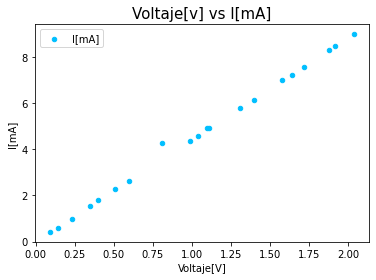

In [11]:
df2v_2.plot.scatter(x="V[v]", y="I[mA]", color="deepskyblue")
plt.title("Voltaje[v] vs I[mA]", size=15)
plt.xlabel("Voltaje[V]")
plt.ylabel("I[mA]")
plt.legend(["I[mA]"])


Parámetros del modelo de regresión lineal
b (Pendiente) =[1.32354402], a (Punto de corte) = -0.12941125852865043

Evaluación de calidad de la regresión
Error Cuadrático Medio (MSE) = 0.10759528073614891
Raíz del error Cuadrático Medio (RMSE) = 0.3280171957933744
Coeficiente de Determinación R2 =0.8606830414424232


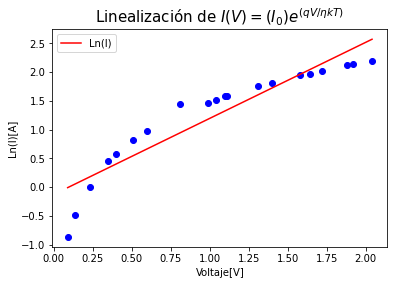

In [12]:
# definimos las variables
x=d2_97.iloc[:,:-1].values
y=d2_97.iloc[:,1].values

#graficamos los datos de entrada
plt.scatter(x, y, label="data", color="blue")


#entrenamos el modelo de regresión lineal
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x.reshape(-1,1),y)

#imprimimos los parámetros que ha estimado la regresión lineal
print("\nParámetros del modelo de regresión lineal")
print("b (Pendiente) =" + str(regresion_lineal.coef_) + ", a (Punto de corte) = " + str(regresion_lineal.intercept_))

pronostico_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
mse= mean_squared_error(y_true = y, y_pred = pronostico_entrenamiento)
rmse = np.sqrt(mse)

#Evaluando la calidad de la regesión
print("\nEvaluación de calidad de la regresión")
print("Error Cuadrático Medio (MSE) = "+ str(mse))
print("Raíz del error Cuadrático Medio (RMSE) = " + str(rmse))
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print("Coeficiente de Determinación R2 =" + str(r2))

#graficamos los datos de entrada
plt.plot(x, pronostico_entrenamiento, label="data", color="red")
plt.title("Linealización de $I(V)=(I_0)e^{(qV/\u03B7kT)}$", size=15)
plt.xlabel("Voltaje[V]")
plt.ylabel("Ln(I)[A]")
plt.legend(["Ln(I)"])

In [13]:
df2t_2=df2t.rename({"V":"V[v]", "Delta V 1.5%": "\u0394V (+/-1.5%)", "I": "I[mA]", "delta I 2%": "\u0394I (+/- 2%)", "T":"Temperatura[°C]","K":"Temperatura[°K]","Delta T": "\u0394VT(+/1 K)"}, axis=1)
df2t_2

,V[v],ΔV (+/-1.5%),I [mA],Delta I 2%,Temperatura[°C],Temperatura[°K],ΔVT(+/1 K)
0,0.14,0.00210,0.61,0.0122,90,363.15,1
1,0.22,0.00330,1.00,0.0200,89,362.15,1
2,0.37,0.00555,1.64,0.0328,88,361.15,1
3,0.42,0.00630,1.93,0.0386,87,360.15,1
4,0.51,0.00765,2.25,0.0450,87,360.15,1
5,0.64,0.00960,2.82,0.0564,86,359.15,1
6,0.71,0.01065,3.10,0.0620,86,359.15,1
7,0.81,0.01215,2.54,0.0508,85,358.15,1
8,0.90,0.01350,3.97,0.0794,84,357.15,1
9,1.02,0.01530,4.47,0.0894,84,357.15,1



Parámetros del modelo de regresión lineal
b (Pendiente) =[[-0.15419192]], a (Punto de corte) = [56.07912626]

Evaluación de calidad de la regresión
Error Cuadrático Medio (MSE) = 0.007011047979797914
Raíz del error Cuadrático Medio (RMSE) = 0.08373200093033675
Coeficiente de Determinación R2 =0.9905582065566074


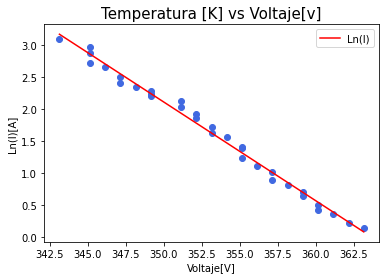

In [14]:
# definimos las variables
y=d2t.iloc[:,:-1].values
x=d2t.iloc[:,1].values

#graficamos los datos de entrada
plt.scatter(x, y, label="data", color="royalblue")


#entrenamos el modelo de regresión lineal
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(x.reshape(-1,1),y)

#imprimimos los parámetros que ha estimado la regresión lineal
print("\nParámetros del modelo de regresión lineal")
print("b (Pendiente) =" + str(regresion_lineal.coef_) + ", a (Punto de corte) = " + str(regresion_lineal.intercept_))

pronostico_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
mse= mean_squared_error(y_true = y, y_pred = pronostico_entrenamiento)
rmse = np.sqrt(mse)

#Evaluando la calidad de la regesión
print("\nEvaluación de calidad de la regresión")
print("Error Cuadrático Medio (MSE) = "+ str(mse))
print("Raíz del error Cuadrático Medio (RMSE) = " + str(rmse))
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print("Coeficiente de Determinación R2 =" + str(r2))

#graficamos los datos de entrada
plt.plot(x, pronostico_entrenamiento, label="data", color="red")
plt.title("Temperatura [K] vs Voltaje[v]", size=15)
plt.xlabel("Voltaje[V]")
plt.ylabel("Ln(I)[A]")
plt.legend(["Ln(I)"])